In [1]:
# Walmart Sales Data Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r'C:\Users\786\OneDrive\Desktop\python_data_project\walmart-sales-data-analysis\walmart-sales-data-analysis\data\raw\Walmart_Sales.csv')


In [4]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:

df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
df = df.drop_duplicates()


In [6]:
df.to_csv('../data/processed/cleaned_walmart_sales.csv', index=False)


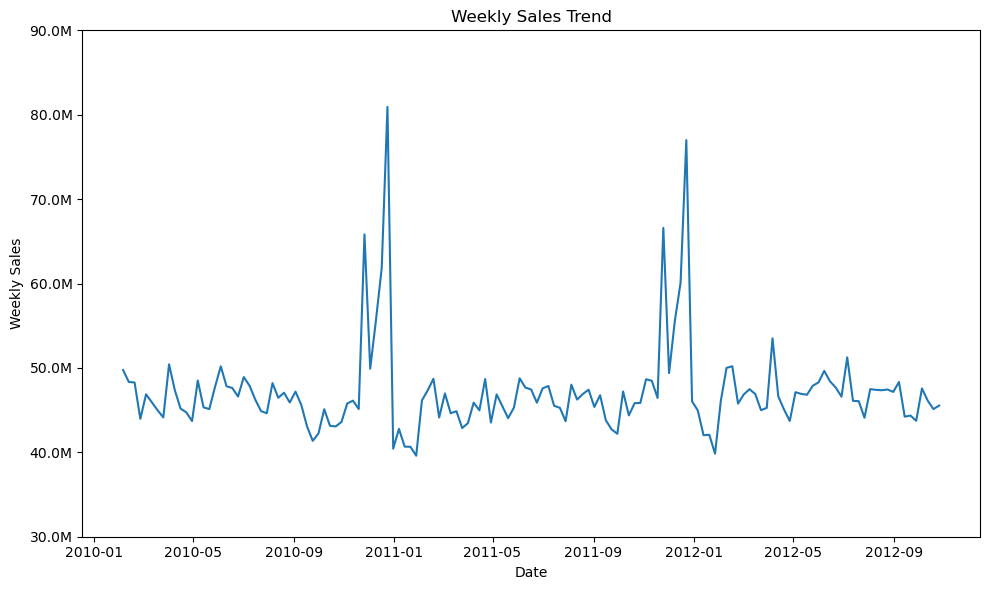

In [7]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10,6))

# Plot
ax.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'])

# Title and labels
ax.set_title('Weekly Sales Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')

# Function to set Y-axis in millions
def set_yticks_million(ax, factor=1_000_000):
    ticks = ax.get_yticks()  # Get current tick values
    ax.set_yticks(ticks)
    ax.set_yticklabels([f'{t/factor:.1f}M' for t in ticks])  # Convert to millions

# Apply Y-axis formatting
set_yticks_million(ax)

# Layout adjustment
plt.tight_layout()

# Save figure
plt.savefig('../images/weekly_sales_trend.png')

plt.show()



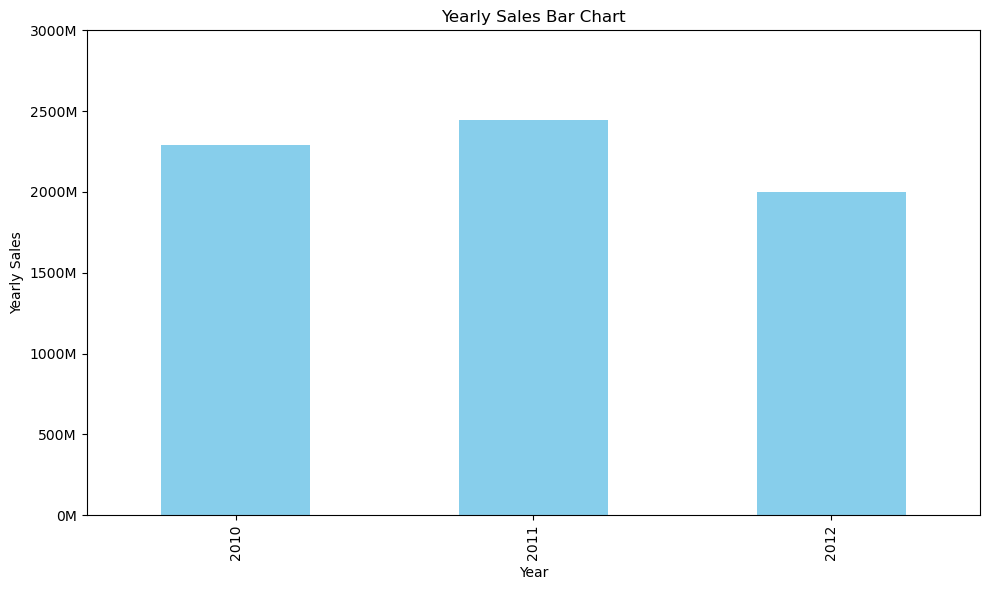

In [8]:
df['Year'] = df['Date'].dt.year

# Aggregate yearly sales
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum()

# Plot and get the Axes object
ax = yearly_sales.plot(kind='bar', figsize=(10,6), color='skyblue')

# Function to convert Y-axis ticks to millions
def set_yticks_million(ax, factor=1_000_000):
    ticks = ax.get_yticks()  # Get current tick values
    ax.set_yticks(ticks)
    ax.set_yticklabels([f'{t/factor:1.0f}M' for t in ticks])  # Convert to millions

# Apply Y-axis formatting
set_yticks_million(ax)

# Labels and title
ax.set_ylabel('Yearly Sales')
ax.set_xlabel('Year')
ax.set_title('Yearly Sales Bar Chart')

plt.tight_layout()

# Save figure
plt.savefig('../images/yearly_sales_bar.png')

# Show plot
plt.show()

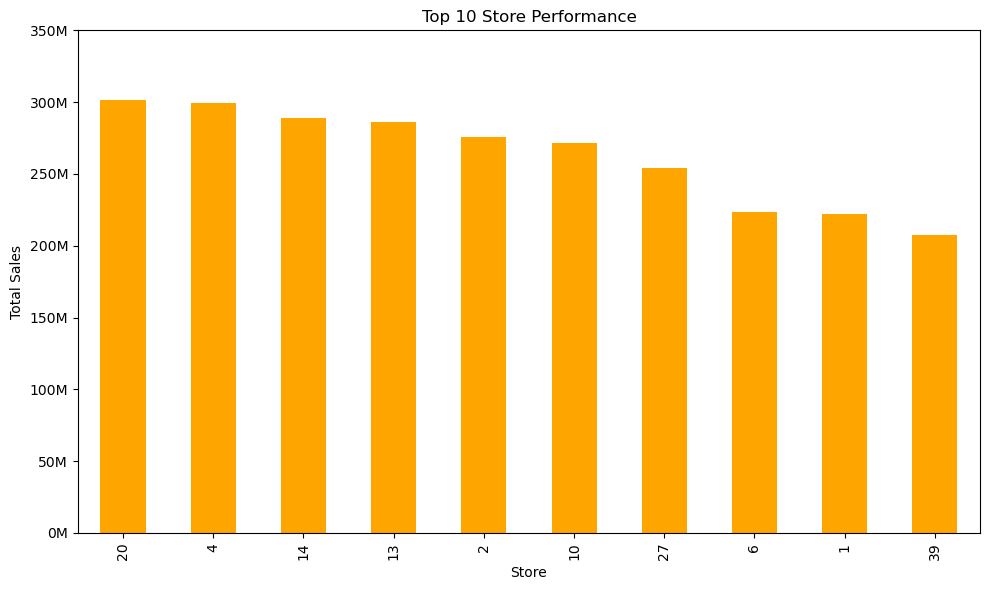

In [9]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Plot top 10 stores and get the Axes object
ax = store_sales.head(10).plot(kind='bar', figsize=(10,6), color='orange')

# Function to convert Y-axis ticks to millions
def set_yticks_million(ax, factor=1_000_000):
    ticks = ax.get_yticks()  # Get current tick values
    ax.set_yticks(ticks)
    ax.set_yticklabels([f'{t/factor:1.0f}M' for t in ticks])  # Convert to millions

# Apply Y-axis formatting
set_yticks_million(ax)

# Labels and title
ax.set_ylabel('Total Sales')
ax.set_xlabel('Store')
ax.set_title('Top 10 Store Performance')

plt.tight_layout()

# Save figure
plt.savefig('../images/store_performance.png')

# Show plot
plt.show()

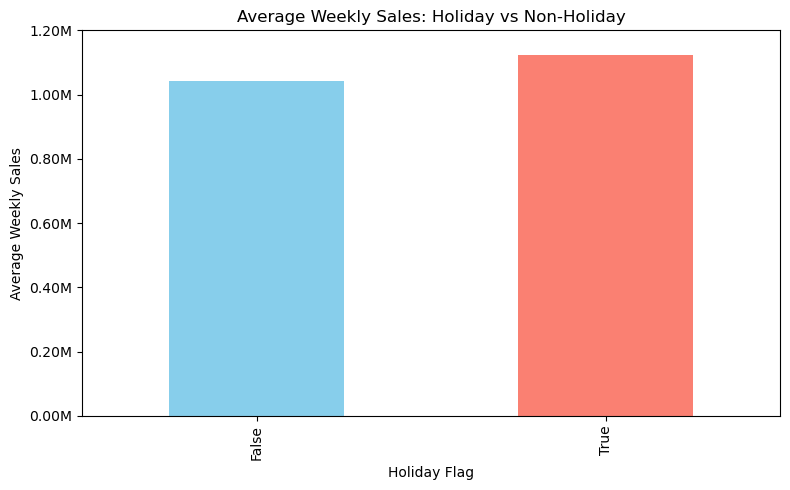

In [10]:
# Convert Holiday_Flag to boolean
df['Holiday_Flag'] = df['Holiday_Flag'].astype(bool)

# Aggregate mean weekly sales by holiday flag
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Plot and get Axes object
ax = holiday_sales.plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])

# Function to convert Y-axis ticks to millions
def set_yticks_million(ax, factor=1_000_000):
    ticks = ax.get_yticks()  # Get current tick values
    ax.set_yticks(ticks)
    ax.set_yticklabels([f'{t/factor:.2f}M' for t in ticks])  # Convert to millions

# Apply Y-axis formatting
set_yticks_million(ax)

# Labels and title
ax.set_ylabel('Average Weekly Sales')
ax.set_xlabel('Holiday Flag')
ax.set_title('Average Weekly Sales: Holiday vs Non-Holiday')

plt.tight_layout()

# Save figure
plt.savefig('../images/holiday_vs_nonholiday.png')

# Show plot
plt.show()

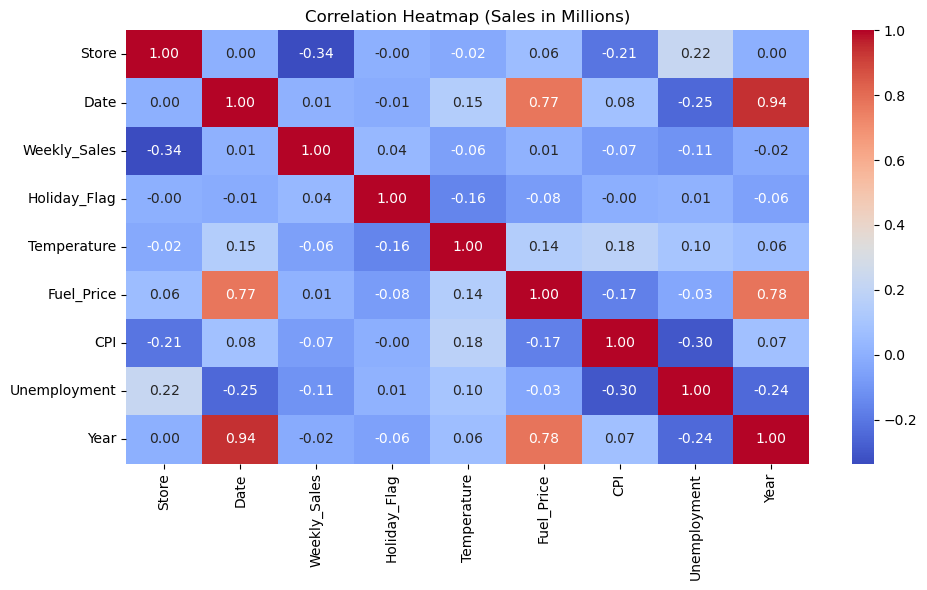

In [11]:
df_million = df.copy()
df_million['Weekly_Sales'] = df_million['Weekly_Sales'] / 1_000_000

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_million.corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation Heatmap (Sales in Millions)")

plt.tight_layout()
plt.savefig('../images/correlation_heatmap.png')
plt.show()

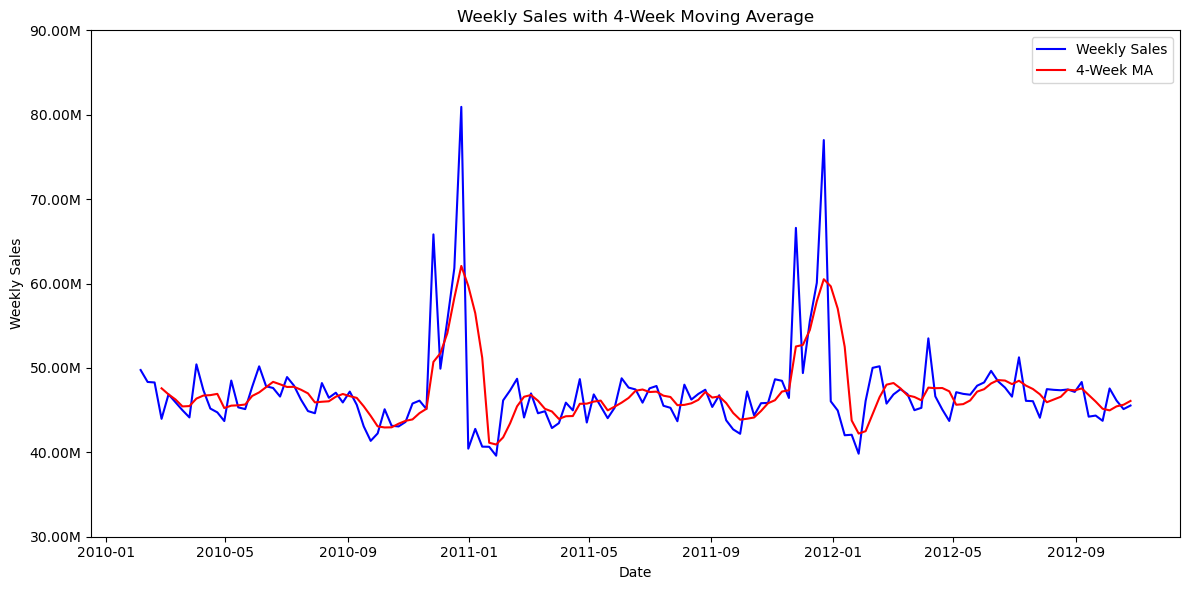

In [12]:
weekly_sales['MA_4'] = weekly_sales['Weekly_Sales'].rolling(4).mean()

# Create figure and axes
fig, ax = plt.subplots(figsize=(12,6))

# Plot actual weekly sales
ax.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], label='Weekly Sales', color='blue')

# Plot 4-week moving average
ax.plot(weekly_sales['Date'], weekly_sales['MA_4'], label='4-Week MA', color='red')


set_yticks_million(ax)

# Labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
ax.set_title('Weekly Sales with 4-Week Moving Average')
ax.legend()

plt.tight_layout()

# Save figure
plt.savefig('../images/sales_forecast.png')

# Show plot
plt.show()


In [14]:
import mysql.connector

import sqlite3
import pandas as pd

# Connect to SQLite database (creates file if not exists)
conn = sqlite3.connect("walmart_sales.db")

# Create table
conn.execute("""
CREATE TABLE IF NOT EXISTS walmart_sales (
    Store INTEGER,
    Dept INTEGER,
    Date TEXT,
    Weekly_Sales REAL,
    Holiday_Flag INTEGER
)
""")

# Insert sample data
conn.execute("INSERT INTO walmart_sales VALUES (1, 1, '2025-01-01', 10000.5, 0)")
conn.commit()

# Query data
df = pd.read_sql("SELECT * FROM walmart_sales", conn)
print(df)


   Store  Dept        Date  Weekly_Sales  Holiday_Flag
0      1     1  2025-01-01       10000.5             0
1      1     1  2025-01-01       10000.5             0


In [13]:
df.to_excel("walmart_sales.xlsx", index=False)


In [1]:
import os

# Root project folder
project_name = "jb skills analysis"

# Folder structure
folders = [
    "data/raw",
    "data/processed",
    "data/external",

    "notebooks",

    "sql",

    "powerbi/exported_images",

    "scripts",

    "reports",

    "visuals/charts",
    "visuals/dashboards",
    "visuals/thumbnails"
]

# Create root folder
os.makedirs(project_name, exist_ok=True)

# Create subfolders
for folder in folders:
    path = os.path.join(project_name, folder)
    os.makedirs(path, exist_ok=True)

# Create common files
files = [
    "README.md",
    "requirements.txt",
    ".gitignore"
]

for file in files:
    open(os.path.join(project_name, file), "w").close()

print("✅ Project folder structure created successfully!")


✅ Project folder structure created successfully!
